In [1]:
#Unit 5 Homework - Financial Planning

In [1]:
import os
import pandas as pd
import alpaca_trade_api as tradeapi
import requests
import json
from alpaca_trade_api.rest import REST, TimeFrame
import matplotlib.pyplot as plt


In [2]:
from dotenv import load_dotenv
load_dotenv()
#Collect Crypto Prices:
#Set amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [3]:
#Crypto API URLs:
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [4]:
#Fetch current BTC price:
btc_data = requests.get(btc_url).json()
btc_price = btc_data["data"]["1"]["quotes"]["CAD"]["price"]
print(btc_price)

55696.6068


In [5]:
#Fetch current ETH price:
eth_data = requests.get(eth_url).json()
eth_price = eth_data["data"]["1027"]["quotes"]["CAD"]["price"]
print(eth_price)

3924.899696


In [6]:
# The current value of my crpto
my_btc_value = my_btc*btc_price
my_eth_value = my_eth*eth_price
total_crypto_value = my_btc_value + my_eth_value
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")
print(f"The total current value of your crypto portfolio is ${total_crypto_value:0.2f}")

The current value of your 1.2 BTC is $66835.93
The current value of your 5.3 ETH is $20801.97
The total current value of your crypto portfolio is $87637.90


In [7]:
#Collect Investments Data 
# Set current amount of shares
my_agg = 200
my_spy = 50

In [8]:
#Load .env environment variables
load_dotenv()
#Load Alpaca Key from .env file
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
#Alpaca API object
alpaca = trade_api.REST(alpaca_api_key,alpaca_secret_key,api_version="v2")

In [9]:
#Set the tickers
ticker = ["AGG","SPY"]
# Get current price for each ticker
investment_df = alpaca.get_bars(ticker,TimeFrame.Day,"2022-03-21","2022-03-21", adjustment="raw").df
investment_df

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-03-21 04:00:00+00:00,107.58,107.649,106.9841,107.04,7583668,27316,107.310151,AGG
2022-03-21 04:00:00+00:00,444.45,446.460,440.6800,444.30,85377983,912432,443.796432,SPY


In [10]:
#Current price of AGG:
agg_close_price = investment_df["close"][0]
#Current price of SPY:
spy_close_price = investment_df["close"][1]
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $107.04
Current SPY closing price: $444.3


In [11]:
# The current value of my shares and bonds
my_agg_value = my_spy*spy_close_price
my_spy_value = my_agg*agg_close_price
total_shares_value = my_agg_value + my_spy_value
# Print current value of shares and bonds
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
print(f"The total current value of your shares and bonds portfolio is ${total_shares_value:0.2f}")

The current value of your 50 SPY shares is $21408.00
The current value of your 200 AGG shares is $22215.00
The total current value of your shares and bonds portfolio is $43623.00


In [12]:
#Saving Health Analysis
monthly_income = 12000
# Consolidate financial assets data
portfolio = {"amount":[total_crypto_value,total_shares_value]}
# Create savings DataFrame
df_savings = pd.DataFrame(data=portfolio,index=["crypto","shares"])
df_savings

,amount
crypto,87637.896549
shares,43623.000000


Text(0.5, 1.0, 'My Personal Savings Composition')

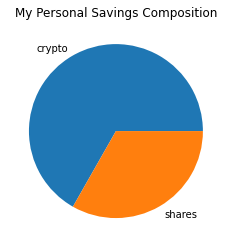

In [13]:
# Plot savings pie chart
plt.pie(df_savings["amount"],labels=df_savings.index)
plt.title("My Personal Savings Composition")

In [14]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_crypto_value + total_shares_value

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund")
if total_savings == emergency_fund:
    print("Congratulating the person on reaching this financial goal")
if total_savings < emergency_fund:
    print(f"You still need {emergency_fund - total_savings} to meet your goal")

Congratulations! You have enough money in your emergency fund


In [26]:
#Retirement Planning
#Get 5 years historical data for "AGG","SPY"
ticker = ["AGG","SPY"]
alpaca_data = alpaca.get_bars(ticker,TimeFrame.Day,"2017-03-21","2022-03-21", adjustment="raw").df
alpaca_data.head(5)


,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2017-03-21 04:00:00+00:00,107.93,108.27,107.9300,108.27,2049680,12024,108.175725,AGG
2017-03-22 04:00:00+00:00,108.44,108.54,108.3600,108.42,2643641,11111,108.455049,AGG
2017-03-23 04:00:00+00:00,108.44,108.51,108.2635,108.45,2071485,10901,108.417635,AGG
2017-03-24 04:00:00+00:00,108.35,108.51,108.3100,108.36,3374871,11229,108.398485,AGG
2017-03-27 04:00:00+00:00,108.65,108.71,108.5345,108.62,1977292,11112,108.600681,AGG


In [27]:
# Reorganize the DataFrame
AGG = alpaca_data[alpaca_data["symbol"]=="AGG"].drop("symbol", axis=1)
SPY = alpaca_data[alpaca_data["symbol"]=="SPY"].drop("symbol", axis=1)
# Concatenate the ticker DataFrames
alpaca_data = pd.concat([AGG , SPY], axis=1, keys=["AGG","SPY"])
alpaca_data.head(5)


AGG                                     \
                             open    high       low   close   volume   
timestamp                                                              
2017-03-21 04:00:00+00:00  107.93  108.27  107.9300  108.27  2049680   
2017-03-22 04:00:00+00:00  108.44  108.54  108.3600  108.42  2643641   
2017-03-23 04:00:00+00:00  108.44  108.51  108.2635  108.45  2071485   
2017-03-24 04:00:00+00:00  108.35  108.51  108.3100  108.36  3374871   
2017-03-27 04:00:00+00:00  108.65  108.71  108.5345  108.62  1977292   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2017-03-21 04:00:00+00:00       12024  108.175725  237.49  237.61  233.58   
2017-03-22 04:00:00+00:00       11111  108.455049  233.73  234.61  233.05   
2017-03-23 04:00:00+00:00       10901  108.417635  233.98  235.34  233.60   
2017-03-24 04:00:00+00:00       11229  108.398485  234.35  235.04  232.96   
2017-03-27 04:00:00+00:00       11112  108.600681  231.97  233.92  231.61   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2017-03-21 04:00:00+00:00  233.73  131809275      443599  234.853857  
2017-03-22 04:00:00+00:00  234.28   97569204      307469  233.932509  
2017-03-23 04:00:00+00:00  234.03  100410277      333903  234.388790  
2017-03-24 04:00:00+00:00  233.86  112504853      359600  234.080978  
2017-03-27 04:00:00+00:00  233.62   87454452      289784  233.041576

In [28]:
from MCForecastTools import MCSimulation 
# Configure a Monte Carlo simulation to forecast 30 years  returns
MC_Simulation_30_years = MCSimulation(
     portfolio_data = alpaca_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*30)

# Print the simulation input data
MC_Simulation_30_years.portfolio_data.head(5)

AGG                                     \
                             open    high       low   close   volume   
timestamp                                                              
2017-03-21 04:00:00+00:00  107.93  108.27  107.9300  108.27  2049680   
2017-03-22 04:00:00+00:00  108.44  108.54  108.3600  108.42  2643641   
2017-03-23 04:00:00+00:00  108.44  108.51  108.2635  108.45  2071485   
2017-03-24 04:00:00+00:00  108.35  108.51  108.3100  108.36  3374871   
2017-03-27 04:00:00+00:00  108.65  108.71  108.5345  108.62  1977292   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-03-21 04:00:00+00:00       12024  108.175725          NaN  237.49   
2017-03-22 04:00:00+00:00       11111  108.455049     0.001385  233.73   
2017-03-23 04:00:00+00:00       10901  108.417635     0.000277  233.98   
2017-03-24 04:00:00+00:00       11229  108.398485    -0.000830  234.35   
2017-03-27 04:00:00+00:00       11112  108.600681     0.002399  231.97   

                                                                          \
                             high     low   close     volume trade_count   
timestamp                                                                  
2017-03-21 04:00:00+00:00  237.61  233.58  233.73  131809275      443599   
2017-03-22 04:00:00+00:00  234.61  233.05  234.28   97569204      307469   
2017-03-23 04:00:00+00:00  235.34  233.60  234.03  100410277      333903   
2017-03-24 04:00:00+00:00  235.04  232.96  233.86  112504853      359600   
2017-03-27 04:00:00+00:00  233.92  231.61  233.62   87454452      289784   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-03-21 04:00:00+00:00  234.853857          NaN  
2017-03-22 04:00:00+00:00  233.932509     0.002353  
2017-03-23 04:00:00+00:00  234.388790    -0.001067  
2017-03-24 04:00:00+00:00  234.080978    -0.000726  
2017-03-27 04:00:00+00:00  233.041576    -0.001026

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

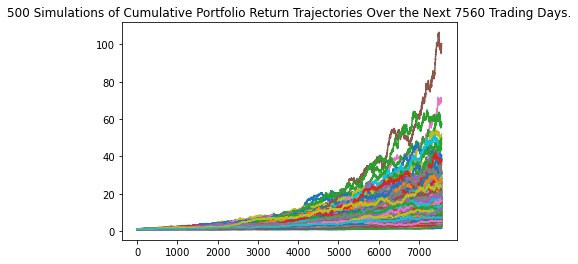

In [30]:
 # Plot simulation outcomes
line_plot = MC_Simulation_30_years.plot_simulation()

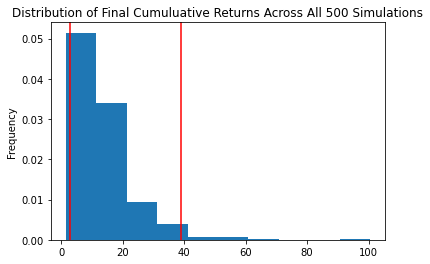

In [31]:
# Plot probability distribution and confidence intervals
dist_plot = MC_Simulation_30_years.plot_distribution()

In [32]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_Simulation_30_years.summarize_cumulative_return()
# Print summary statistics
print(even_tbl)

count           500.000000
mean             13.688919
std              10.255695
min               1.432063
25%               7.186620
50%              10.936853
75%              17.216007
max             100.513297
95% CI Lower      2.819456
95% CI Upper     38.970898
Name: 7560, dtype: float64


In [33]:

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000 investments in stocks
even_ci_lower = round(even_tbl[8]*20000,2)
even_ci_upper = round(even_tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $20,000 in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}.")

There is a 95% chance that an initial investment of $20,000 in the portfolio over the next 30 years will end within in the range of $56389.12 and $779417.96.


In [34]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000 investments in stocks
even_ci_lower = round(even_tbl[8]*30000,2)
even_ci_upper = round(even_tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $30,000 in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}.")

There is a 95% chance that an initial investment of $30,000 in the portfolio over the next 30 years will end within in the range of $84583.67 and $1169126.95.
